In [2]:
import numpy as np
import random
import pandas as pd
import matplotlib.pyplot as plt

## Environement

In [3]:
ROWS = 4
COLS = 12
S = (3, 0)
G = (3, 11)

actions = ['UP', 'DOWN', 'RIGHT', 'LEFT']

class Cliff:

    def __init__(self):
        self.end = False
        self.pos = S
        self.board = np.zeros([ROWS, COLS])
        # add cliff marked as -1
        self.board[ROWS-1, 1:COLS-1] = -1

    def step(self, action):
        if actions[action] == 'UP':
            nxtPos = (self.pos[0] - 1, self.pos[1])
        elif actions[action] == 'DOWN':
            nxtPos = (self.pos[0] + 1, self.pos[1])
        elif actions[action] == 'LEFT':
            nxtPos = (self.pos[0], self.pos[1] - 1)
        else:
            nxtPos = (self.pos[0], self.pos[1] + 1)
        
        # check legitimacy
        if nxtPos[0] >= 0 and nxtPos[0] <= 3:
            if nxtPos[1] >= 0 and nxtPos[1] <= 11:
                self.pos = nxtPos

        if self.pos == G:
            self.end = True
            self.reward = 0
            print("Game ends reaching goal")
        elif self.board[self.pos] == -1:
            self.end = True
            self.reward = -100
            #print("Game ends falling off cliff")
        else:
            self.reward = -1

        return self.pos, self.reward, self.end

    def reset(self):
        self.end = False
        self.pos = (3, 0) 
        return self.pos

In [4]:
def egreedy_policy(q_values, state, epsilon):
    ''' 
    Choose an action based on a epsilon greedy policy.    
    A random action is selected with epsilon probability, else select the best action.    
    '''
    if np.random.random() < epsilon:
        return np.random.choice(4)
    else:
        return np.argmax(q_values[state])

In [5]:
# # The number of states in simply the number of "squares" in our grid world, in this case 4 * 12
# num_states = 4 * 12
# # We have 4 possible actions, up, down, right and left
# num_actions = 4

# q_values = np.zeros((4, 12, 4))

In [6]:
# q_values = [[ [0,0,0,0],  [0,0,0,0], [0,0,0,0], [0,0,0,0],  [0,0,0,0], [0,0,0,0], [0,0,0,0],  [0,0,0,0], [0,0,0,0], [0,0,0,0],  [0,0,0,0], [0,0,0,0] ], 
# [ [0,0,0,0],  [0,0,0,0], [0,0,0,0], [0,0,0,0],  [0,0,0,0], [0,0,0,0], [0,0,0,0],  [0,0,0,0], [0,0,0,0], [0,0,0,0],  [0,0,0,0], [0,0,0,0] ],
# [ [0,0,0,0],  [0,0,0,0], [0,0,0,0], [0,0,0,0],  [0,0,0,0], [0,0,0,0], [0,0,0,0],  [0,0,0,0], [0,0,0,0], [0,0,0,0],  [0,0,0,0], [0,0,0,0] ],
# [ [0,0,0,0],  [0,0,0,0], [0,0,0,0], [0,0,0,0],  [0,0,0,0], [0,0,0,0], [0,0,0,0],  [0,0,0,0], [0,0,0,0], [0,0,0,0],  [0,0,0,0], [0,0,0,0] ]]

In [12]:
episodes = 50000
q_values = np.zeros((4, 12, 4))
# Hyperparameters of SARSA

#Learning rate (try different values)
alpha = 0.001

# discount factor (Try: if you set gamma to 0, the agent becomes myopic and maximizes the immediate reward, instead of the sum of rewards.
gamma = 0.99

ep_rewards = []

#history
Q_s_a_t = np.zeros((4, 12, 4, episodes))
RPE_s_a_t = np.zeros((4, 12, 4, episodes))
episode_s_a_t = np.zeros((4, 12, 4, episodes))

# Hyperparameters for epsilon geedy policy
epsilon = 0.99 # initial value
epsilon_min = .01 # minimal value
epsilon_decay_rate = 0.9998 # decay at each episode

# The number of states in simply the number of "squares" in our grid world, in this case 4 * 12
num_states = 4 * 12
# We have 4 possible actions, up, down, right and left
num_actions = 4
cliff = Cliff()

#q_values = np.zeros((num_states, num_actions))
for e in range(episodes):
    cliff.reset()
    current_state = cliff.pos
    current_action = egreedy_policy(q_values, current_state, epsilon)
    reward_sum = 0
    while not cliff.end:
        next_state, reward, done = cliff.step(current_action)
        #print(current_action)
        #print(next_state)

        next_action = egreedy_policy(q_values, next_state, epsilon)

        rpe = reward + gamma * q_values[next_state][next_action]- q_values[current_state][current_action]
        q_values[current_state][current_action] += alpha * rpe

        reward_sum += reward

        # track history
        Q_s_a_t[current_state][current_action][e] = q_values[current_state][current_action]
        RPE_s_a_t[current_state][current_action][e] = rpe
        episode_s_a_t[current_state][current_action][e]  = e


        # S <- S'
        current_state = next_state
        # A <- A'
        current_action = next_action

    
    
    ep_rewards.append(reward_sum)

    epsilon = max(epsilon*epsilon_decay_rate, epsilon_min)
 #   epsilon_t.append(epsilon)

Game ends reaching goal
Game ends reaching goal
Game ends reaching goal
Game ends reaching goal
Game ends reaching goal
Game ends reaching goal
Game ends reaching goal
Game ends reaching goal
Game ends reaching goal
Game ends reaching goal
Game ends reaching goal
Game ends reaching goal
Game ends reaching goal
Game ends reaching goal
Game ends reaching goal
Game ends reaching goal
Game ends reaching goal
Game ends reaching goal
Game ends reaching goal
Game ends reaching goal
Game ends reaching goal
Game ends reaching goal
Game ends reaching goal
Game ends reaching goal
Game ends reaching goal
Game ends reaching goal
Game ends reaching goal
Game ends reaching goal
Game ends reaching goal
Game ends reaching goal
Game ends reaching goal
Game ends reaching goal
Game ends reaching goal
Game ends reaching goal
Game ends reaching goal
Game ends reaching goal
Game ends reaching goal
Game ends reaching goal
Game ends reaching goal
Game ends reaching goal
Game ends reaching goal
Game ends reachi

In [13]:
q_values

array([[[-10.33379184, -10.33397712, -10.33412058, -10.33508057],
        [ -9.81448745,  -9.81349127,  -9.81314852,  -9.81296606],
        [ -9.15870462,  -9.15858931,  -9.15808417,  -9.1579027 ],
        [ -8.44082697,  -8.44040071,  -8.44037284,  -8.44191341],
        [ -7.68497733,  -7.68462381,  -7.68390886,  -7.68420781],
        [ -6.90060095,  -6.90067206,  -6.90005583,  -6.90012404],
        [ -6.09695098,  -6.09585028,  -6.09549216,  -6.09641436],
        [ -5.27571988,  -5.2756791 ,  -5.2754986 ,  -5.27709869],
        [ -4.44555692,  -4.44552056,  -4.4451158 ,  -4.44622033],
        [ -3.6099812 ,  -3.60902133,  -3.60897883,  -3.6088795 ],
        [ -2.77371604,  -2.7724668 ,  -2.77245257,  -2.77401522],
        [ -1.95097632,  -1.94982306,  -1.95024027,  -1.94986735]],

       [[-10.80701693, -10.8080927 , -10.8067145 , -10.80708336],
        [-10.07691293, -10.07699362, -10.07684824, -10.07674369],
        [ -9.29175666,  -9.29213586,  -9.2915239 ,  -9.29222948],
        

## visualize history

In [9]:
# a helper to visualize Q(s,a) RPE
def plt_Q_RPE(state, action, Q, RPE, timestamps):
    plt.figure(figsize=[14, 5])
    plt.plot(timestamps[state][action], Q[state][action], '.', markersize=0.7, label='Q(S{},A{})'.format(state, action))
    plt.plot(timestamps[state][action], RPE[state][action], '.', markersize=0.7, label='RPE')
    plt.title('RPE and Q at state S{} for action {}'.format(state, action))
    plt.legend(loc='best')

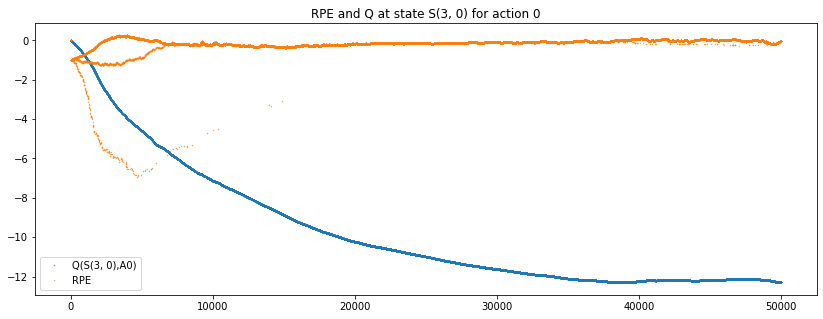

In [14]:
# start with action up
plt_Q_RPE(S, 0, Q_s_a_t,  RPE_s_a_t, episode_s_a_t)

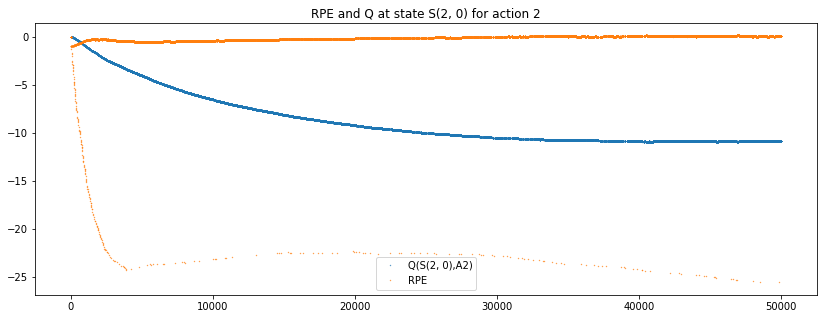

In [11]:
# (2,0) with action right
plt_Q_RPE((2,0), 2, Q_s_a_t,  RPE_s_a_t, episode_s_a_t)